<a href="https://colab.research.google.com/github/nrjanjanam/IVAssignment2/blob/main/IV_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2: Misleading Visualization**

*CS-GY 6313 B: Information Visualization*

## Importing Necessary Packages

In [ ]:
!pip install gdown

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import gdown
import seaborn as sns

## Reading and Viewing Data

Downloading Sunshine Data (from link mentioned in Assignment Question)

In [ ]:
file_id = '1WES1bADljN5JQJgSAPUpcipBHyTZi1xk'
output = 'fullglobalterror.zip'
gdown.download(id=file_id, output=output, quiet=False)

!unzip sunshine_data.zip

/usr/local/lib/python3.10/dist-packages/gdown/download.py:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(line, features="html.parser")


FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1WES1bADljN5JQJgSAPUpcipBHyTZi1xk

but Gdown can't. Please check connections and permissions.

In [ ]:
df_sunshine = pd.read_csv('/content/climate.csv')
df_sunshine.head()

,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281


## Exploratory Analysis to form the right questions

In [ ]:
df_sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      72 non-null     object 
 1   lon       72 non-null     float64
 2   lat       72 non-null     float64
 3   month     72 non-null     object 
 4   monthnum  72 non-null     int64  
 5   sunshine  72 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.5+ KB


In [ ]:
df_sunshine = df_sunshine.sort_values(['city', 'monthnum'], ascending=[True, True])
df_sunshine

,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281
...,...,...,...,...,...,...
67,Seattle,-122.335167,47.608013,Aug,7,281
68,Seattle,-122.335167,47.608013,Sep,8,221
69,Seattle,-122.335167,47.608013,Oct,9,142
70,Seattle,-122.335167,47.608013,Nov,10,72


## Transformations

Find the city with the most balanced sunshine hours to highlight in the plot

In [ ]:
# Calculate standard deviation for each city
std_devs = df_sunshine.groupby('city')['sunshine'].std()

# Find the city with the lowest standard deviation
min_std_city = std_devs.idxmin()


Pivot the data for plotting purpose

In [ ]:
# Pivot the data for plotting
pivot_df = df_sunshine.pivot(index='monthnum', columns='city', values='sunshine')
pivot_df

city,Chicago,Houston,Miami,New York,San Francisco,Seattle
monthnum,,,,,,
0,135,144,222,154,165,69
1,136,141,227,171,182,108
2,187,193,266,213,251,178
3,215,212,275,237,281,207
4,281,266,280,268,314,253
5,311,298,251,289,330,268
6,318,294,267,302,300,312
7,283,281,263,271,272,281
8,226,238,216,235,267,221


#Plotting

Visualization for answering the question

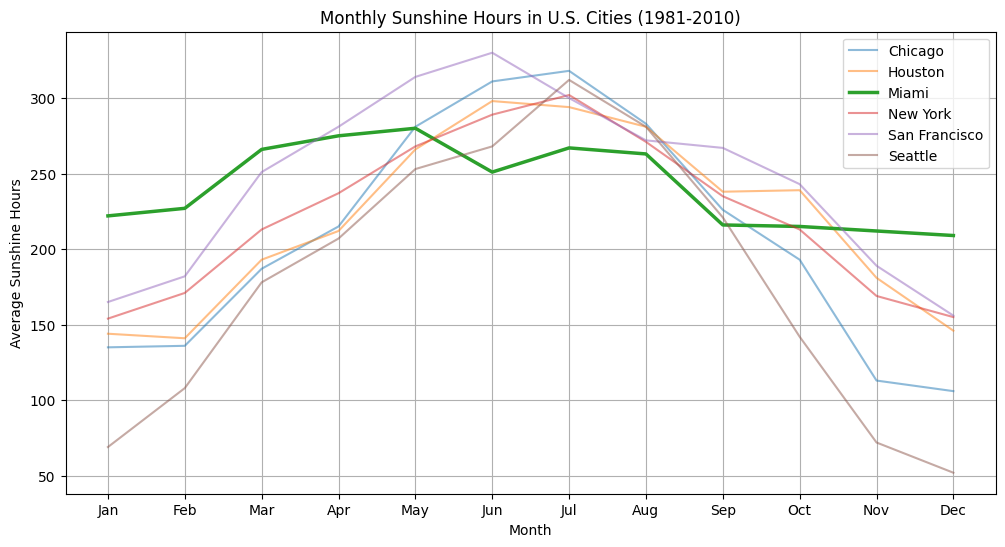

In [ ]:
plt.figure(figsize=(12, 6))
for city in pivot_df.columns:
    if city == min_std_city:
        plt.plot(pivot_df.index, pivot_df[city], label=city, linewidth=2.5)
    else:
        plt.plot(pivot_df.index, pivot_df[city], label=city, alpha=0.5)

# Customize the plot
plt.title('Monthly Sunshine Hours in U.S. Cities (1981-2010)')
plt.xlabel('Month')
plt.ylabel('Average Sunshine Hours')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()